# Fully Connected Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Iris dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Music data. You will be performing a genre classification of tracks into 16 different classes

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the cells in Genre Classification part. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [1]:
%matplotlib inline
import numpy as np
from blg561.layer import layer
from blg561.checks import *
from blg561.utils import load_mnist_data
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

### To auto-reload your modules from the *.py files, re run the following cell

In [2]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [3]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])


relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


### Backward pass : 
Go under blg561e/layer.py and find Affine class. Implement the backward pass for Affine layer.

In [4]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  4.7047188268335425e-09
dw error:  1.0253793048198812e-10
db error:  4.978984658437728e-11


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [5]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [6]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)

# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  3.2756263483625388e-12


### d. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the end of the network, we utilize softmax function to turn the likelihood of each class into class probablities. Then, we pick the class label by selecting the class with the highest probability.
For a 2-class (binary) problem, this reduces to using binary cross entropy loss.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [15]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = layer.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302574440410131
dx error:  0.818552362798033


### e. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivate. Do not forget to use your activation in training part with the Iris data to show that it works and makes sense. You can also plot your activation for litte extra credits.

In [17]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  1.0


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization**

In [18]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSDGOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]


In [19]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
    

for i in range(4):

    relError = rel_error(student_out[i], expected[i])

    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    #assert 1e-6 > relError
    print(relError)

Testing Weights of 0th layer
5.987166802597242e-08
Testing biases of 1th layer
8.229919669522101e-09
Testing Weights of 0th layer
1.5646318332937773e-08
Testing biases of 1th layer
2.2647965779580082e-07


In [20]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]
    
    


In [21]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    print(relError)
    assert 1e-6 > relError

Testing Weights of 0th layer
5.987166802597242e-08
Testing biases of 1th layer
8.229919669522101e-09
Testing Weights of 0th layer
1.5646318332937773e-08
Testing biases of 1th layer
2.2647965779580082e-07


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known IRIS dataset.

In [30]:
from sklearn import preprocessing
from sklearn.datasets import load_iris  # Load dataset
data = load_iris()
X, y = data.data, data.target
model = layer.Model() # Create a model instance
 
# Iris dataset has 4 features, so the input size of first layer is 4. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
layers = [layer.AffineLayer(4,64), layer.ReLU(), layer.AffineLayer(64,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(150)
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0
n_epochs = 1200
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-1, regularization_str=regularization_strength)
#try with vanilla optimizer
#optimizer = layer.VanillaSDGOptimizer(model,lr=1e-1, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()
    
    if epoch % test_every == 0:
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        test_losses.append([loss for _ in range(test_every)])
        test_accs.append([test_acc for _ in range(test_every)])
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 1.1749684381621393, Accuracy: 0.38333333333333336
Epoch: 0, Test Loss: 1.02073508722553, Test Accuracy: 0.5
Epoch: 50, Loss: 0.7581135366576767, Accuracy: 0.9416666666666667
Epoch: 100, Loss: 0.6644043729608823, Accuracy: 0.9666666666666667
Epoch: 150, Loss: 0.6295534284516895, Accuracy: 0.9666666666666667
Epoch: 200, Loss: 0.6135068869519124, Accuracy: 0.9666666666666667
Epoch: 200, Test Loss: 0.6221942221058598, Test Accuracy: 0.9333333333333333
Epoch: 250, Loss: 0.6038853800009927, Accuracy: 0.9666666666666667
Epoch: 300, Loss: 0.59731524915329, Accuracy: 0.9666666666666667
Epoch: 350, Loss: 0.5923452263835572, Accuracy: 0.975
Epoch: 400, Loss: 0.5883951133290165, Accuracy: 0.9833333333333333
Epoch: 400, Test Loss: 0.605937828742858, Test Accuracy: 0.9333333333333333
Epoch: 450, Loss: 0.5851906116586716, Accuracy: 0.9833333333333333
Epoch: 500, Loss: 0.5825851868796195, Accuracy: 0.9916666666666667
Epoch: 550, Loss: 0.5803947343387954, Accuracy: 0.9916666666666667
Ep

### Plot the training and test loss curves for diagnostics below:

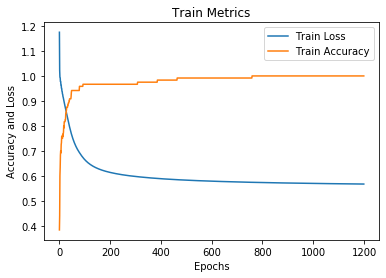

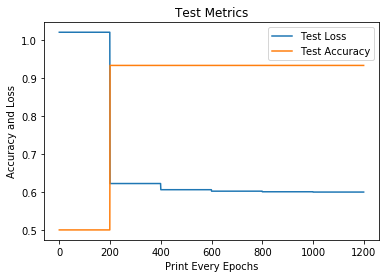

In [31]:
def plot_curves(loss,accuracy,title,loss_label,accuracy_label,x_label,y_label):
    fig = plt.figure()
    axes= fig.add_subplot(111)
    axes.plot(loss,label = loss_label)
    axes.plot(accuracy, label = accuracy_label)
    axes.legend()
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(title)
    plt.show()
    
test_losses = list(np.array(test_losses).flatten())
test_accs = list(np.array(test_accs).flatten())
plot_curves(train_losses,train_accs,"Train Metrics","Train Loss","Train Accuracy","Epochs","Accuracy and Loss")
plot_curves(test_losses,test_accs,"Test Metrics","Test Loss","Test Accuracy","Print Every Epochs","Accuracy and Loss")


### Music Genre Classification

Now, in this part, you will work with music data (https://github.com/mdeff/fma) for genre classification. Tracks are from 16 genre classes which are: ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']. Below, preprocessing codes are already implemented. You have to download data from https://drive.google.com/open?id=1pxbCfRj8x7cekSH--652qy-Wz8QFcvek and place them properly. You will need to use batch-wise optimizer since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [32]:
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [33]:
features = pd.read_csv('features_medium.csv', index_col=0, header=[0, 1, 2])
tracks = pd.read_csv('tracks_medium.csv', index_col=0, header=[0, 1])

In [34]:
ipd.display(tracks['track'].loc[[10,213,397]])
ipd.display(tracks['artist'].loc[[10,213,397]])

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
213,256000,0,Luke Wyland,2008-11-26 01:48:12,2007-01-01 00:00:00,247,10,Pop,[10],[10],NaN,2828,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1148,NaN,1,NaN,[],Boute
397,256000,0,Borful Tang,2008-11-26 01:57:15,2006-08-30 00:00:00,240,1,Electronic,[15],[15],NaN,3102,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,427,NaN,4,NaN,[],The Tides Of Land


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
10,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN
213,2005-01-01 00:00:00,NaN,"Aagoo, Oedipus, Popfrenzy, Inpartmaint","<p><span style=""font-family:Verdana, Geneva, A...",1,2008-11-26 01:51:30,11,66,45.523452,"Portland, OR",-122.676207,Luke Wyland and Dana Valatka,Au,NaN,['au'],http://au-au-au.com/ http://myspace.com/peaof...,NaN
397,NaN,NaN,Snurp,<p><em>The Story of Borful Tang</em> is a long...,0,2008-11-26 01:59:22,8,90,37.774929,"San Francisco, CA",-122.419415,Dominic Cramp,Borful Tang,"Qulfus, Carla Bozulich's Evangelista",['borful tang'],http://www.gigantesound.com/artist_borful.html,NaN


In [35]:
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))
genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
print('Top genres ({}): {}'.format(len(genres), genres))


19922 training examples, 2505 validation examples, 2573 testing examples
Top genres (16): ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']


In [36]:
# Assign an integer value to each genre.
columns = ['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc',
           'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff',
           'tonnetz', 'zcr']
enc = LabelEncoder()
labels = tracks['track', 'genre_top']

# Split in training, validation and testing sets.
y_train = enc.fit_transform(labels[train])
y_val = enc.transform(labels[val])
y_test = enc.transform(labels[test])
x_train = features.loc[train, columns].as_matrix()
x_val = features.loc[val, columns].as_matrix()
x_test = features.loc[test, columns].as_matrix()

x_train, y_train = shuffle(x_train, y_train, random_state=42)



/home/alperen/anaconda3/envs/PyTorch/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/alperen/anaconda3/envs/PyTorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/home/alperen/anaconda3/envs/PyTorch/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [37]:
num_features = x_train.shape[1]
num_train_samples = y_train.size
num_val_samples = y_val.size
num_test_samples = y_test.size
num_labels = np.unique(y_train).size

print('{} training examples, {} validation examples, {} testing examples'.format(num_train_samples, num_val_samples, num_test_samples))
print('{} features, {} classes'.format(num_features, num_labels))


19922 training examples, 2505 validation examples, 2573 testing examples
511 features, 16 classes


**Standardize features by removing the mean and scaling to unit variance. Extract mean and standard deviation only from training set. Keep mean and std as variables, you can use it for the demo part.**

In [38]:
train_mean = np.mean(x_train,axis=0)
train_std  = np.std(x_train,axis=0)
x_train_standard = np.divide((x_train-train_mean),train_std)

val_mean = np.mean(x_val,axis=0)
val_std  = np.std(x_val,axis=0)
x_val_standard = np.divide((x_val-val_mean),val_std)

test_mean = np.mean(x_test,axis=0)
test_std  = np.std(x_test,axis=0)
x_test_standard = np.divide((x_test-test_mean),test_std)

**You will use your implementations (layers.py) below to carry out the classification of each track vector into 16 classes. Construct your model with all its layers below.**

In [39]:
def train(n_epochs,learning_rate=1e-1,reg_str=1e-6,return_model = False):
    model = layer.Model()
    # num_features -> 512 -> 256 -> 128 -> 64 -> num_classes
    """layers = [layer.AffineLayer(x_train.shape[1],90), layer.ReLU(),
              #layer.AffineLayer(96,32), layer.ReLU(),
              layer.AffineLayer(90,num_labels), layer.Softmax()]"""
    layers = [layer.AffineLayer(x_train.shape[1],90), layer.ReLU(),
              layer.AffineLayer(90,num_labels), layer.Softmax()]
    model(layers) # Load layers to model object


    # Options
    metrics = {}
    train_losses = []
    val_losses   = []
    test_losses  = []
    
    train_accs   = []
    val_accs     = []
    test_accs    = []
    
    print_every = 125
    test_every  = 200

    optimizer = layer.SGDWithMomentum(model,lr=learning_rate, regularization_str=reg_str)

    for epoch in range(0,n_epochs+1):
        ### Training Phase ###
        softmax_out = model.forward(x_train_standard)
        predictions = np.argmax(softmax_out, axis=1)

        train_acc = np.mean(predictions == y_train)
        loss = layer.loss(softmax_out, y_train)


        if epoch % print_every == 0:    
            train_accs.append(train_acc)
            train_losses.append(loss)
            print("Epoch: {}\t Train\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, loss, train_acc))

        model.backward(y_train)
        optimizer.optimize()

        ### Validation Phase ###
        softmax_out = model.forward(x_val_standard)
        predictions = np.argmax(softmax_out, axis=1)

        val_acc = np.mean(predictions == y_val)
        val_loss = layer.loss(softmax_out, y_val)
        

        if epoch % print_every == 0:
            val_accs.append(val_acc)
            val_losses.append(val_loss)
            print("Epoch: {}\t Valid.\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, val_loss, val_acc))
        
        ### Test Phase ###
        if epoch % test_every == 0:
            softmax_out = model.forward(x_test_standard)
            predictions = np.argmax(softmax_out, axis=1)
            test_loss = layer.loss(softmax_out, y_test)
            test_acc = np.mean(predictions == y_test)
            test_losses.append([loss for _ in range(test_every//print_every)])
            test_accs.append([test_acc for _ in range(test_every//print_every)])
            print("Epoch: {}\t Test\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, test_loss, test_acc))
    
    test_losses = list(np.array(test_losses).flatten())
    test_accs = list(np.array(test_accs).flatten())

    metrics['train_loss'] = train_losses
    metrics['val_loss'] = val_losses
    metrics['test_loss'] = test_losses
    metrics['train_acc'] = train_accs
    metrics['val_acc'] = val_accs
    metrics['test_acc'] = test_accs
    print("Training finished lr: {} regul: {:.4} with Test Accuracy: {:.4}".format(learning_rate,reg_str,test_accs[-1]))
    if return_model:
        return model, metrics
    
    return metrics    

### Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such. Also, try using an L1 regularizer or other regularizer you may come up with. 
### Compare the outcomes. Avoid overfitting and underfitting as much as possible.  
### We expect you to get at least 60% Test Accuracy**

Epoch: 0	 Train	 Loss: 2.815,	 Accuracy: 0.02575
Epoch: 0	 Valid.	 Loss: 2.622,	 Accuracy: 0.3261
Epoch: 0	 Test	 Loss: 2.627,	 Accuracy: 0.2989
Epoch: 125	 Train	 Loss: 2.401,	 Accuracy: 0.5508
Epoch: 125	 Valid.	 Loss: 2.489,	 Accuracy: 0.4703
Epoch: 200	 Test	 Loss: 2.426,	 Accuracy: 0.5317
Epoch: 250	 Train	 Loss: 2.359,	 Accuracy: 0.6037
Epoch: 250	 Valid.	 Loss: 2.449,	 Accuracy: 0.5437
Epoch: 375	 Train	 Loss: 2.321,	 Accuracy: 0.657
Epoch: 375	 Valid.	 Loss: 2.4,	 Accuracy: 0.596
Epoch: 400	 Test	 Loss: 2.373,	 Accuracy: 0.583
Epoch: 500	 Train	 Loss: 2.317,	 Accuracy: 0.7016
Epoch: 500	 Valid.	 Loss: 2.347,	 Accuracy: 0.6399
Epoch: 600	 Test	 Loss: 2.355,	 Accuracy: 0.6168
Epoch: 625	 Train	 Loss: 2.292,	 Accuracy: 0.7192
Epoch: 625	 Valid.	 Loss: 2.342,	 Accuracy: 0.6603
Epoch: 750	 Train	 Loss: 2.282,	 Accuracy: 0.733
Epoch: 750	 Valid.	 Loss: 2.332,	 Accuracy: 0.6675
Epoch: 800	 Test	 Loss: 2.339,	 Accuracy: 0.63
Epoch: 875	 Train	 Loss: 2.272,	 Accuracy: 0.7384
Epoch: 875	

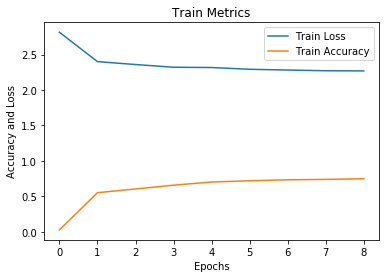

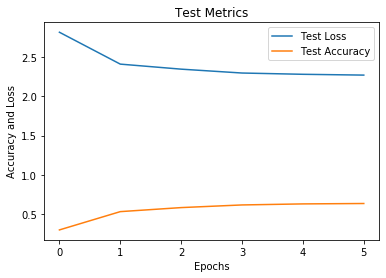

In [40]:
model, metrics = train(1000,learning_rate=3e-1,reg_str=1e-2,return_model=True)

plot_curves(metrics["train_loss"],metrics["train_acc"],"Train Metrics","Train Loss","Train Accuracy","Epochs","Accuracy and Loss")
plot_curves(metrics["test_loss"],metrics["test_acc"],"Test Metrics","Test Loss","Test Accuracy","Epochs","Accuracy and Loss")

### Plot histogram of the weights of affine layers to see whether the weights vanish or not and comment.

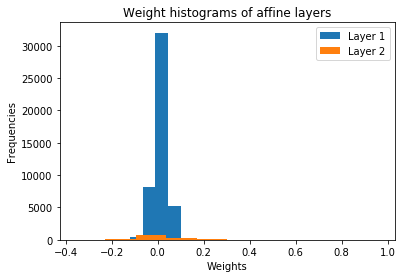

In [41]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_xlabel("Weights")
axes.set_ylabel("Frequencies")
axes.set_title("Weight histograms of affine layers")
layer_n = 0
for m in model:
    if isinstance(m,layer.LayerWithWeights):
        layer_n += 1
        axes.hist(m.W.flatten(),label="Layer {}".format(layer_n),histtype="bar")
axes.legend()
plt.show()
#%xdel model
#%xdel metrics

### Since dimensions of the layers are not equal histogram looks wrong but, you can see that weights are more equally distributed between -0.2 and 0.2 at layer2. That show us weights are not vanish (vanishing gradient happens when weights are all 0). This problem doesn't need a deep fcn therefore vanishing gradient is not a really problem for this network. Also usage of the ReLU also prevents the vanishing gradient problem beforehand.

### Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors

In [42]:
reg1_metrics = train(1000,learning_rate=3e-1,reg_str=1e-3)
reg2_metrics = train(1000,learning_rate=3e-1,reg_str=1e-1)

Epoch: 0	 Train	 Loss: 2.814,	 Accuracy: 0.02736
Epoch: 0	 Valid.	 Loss: 2.626,	 Accuracy: 0.3146
Epoch: 0	 Test	 Loss: 2.628,	 Accuracy: 0.3012
Epoch: 125	 Train	 Loss: 2.391,	 Accuracy: 0.5415
Epoch: 125	 Valid.	 Loss: 2.472,	 Accuracy: 0.4747
Epoch: 200	 Test	 Loss: 2.422,	 Accuracy: 0.5177
Epoch: 250	 Train	 Loss: 2.407,	 Accuracy: 0.5269
Epoch: 250	 Valid.	 Loss: 2.455,	 Accuracy: 0.4798
Epoch: 375	 Train	 Loss: 2.342,	 Accuracy: 0.602
Epoch: 375	 Valid.	 Loss: 2.465,	 Accuracy: 0.487
Epoch: 400	 Test	 Loss: 2.414,	 Accuracy: 0.527
Epoch: 500	 Train	 Loss: 2.342,	 Accuracy: 0.6153
Epoch: 500	 Valid.	 Loss: 2.386,	 Accuracy: 0.5569
Epoch: 600	 Test	 Loss: 2.392,	 Accuracy: 0.5515
Epoch: 625	 Train	 Loss: 2.319,	 Accuracy: 0.629
Epoch: 625	 Valid.	 Loss: 2.408,	 Accuracy: 0.5297
Epoch: 750	 Train	 Loss: 2.315,	 Accuracy: 0.6487
Epoch: 750	 Valid.	 Loss: 2.362,	 Accuracy: 0.5729
Epoch: 800	 Test	 Loss: 2.394,	 Accuracy: 0.5453
Epoch: 875	 Train	 Loss: 2.279,	 Accuracy: 0.6826
Epoch: 

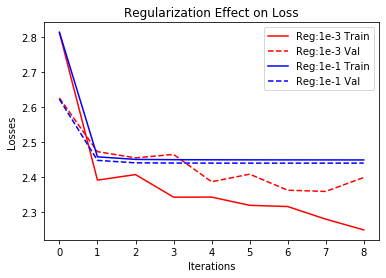

In [46]:
fig = plt.figure()
axes = plt.subplot(111)
axes.plot(reg1_metrics["train_loss"],color="r",linestyle="-" ,label='Reg:1e-3 Train')
axes.plot(reg1_metrics["val_loss"],color="r",linestyle="--" ,label='Reg:1e-3 Val')
axes.plot(reg2_metrics["train_loss"],color="b",linestyle="-" , label='Reg:1e-1 Train')
axes.plot(reg2_metrics["val_loss"],color="b",linestyle="--" , label='Reg:1e-1 Val')
axes.set_xlabel("Iterations")
axes.set_ylabel("Losses")
axes.legend()
axes.set_title("Regularization Effect on Loss")
plt.show()

### As we can see lower regularization gives better results for this network. Reason can be the model choice or number of hidden layers.

### Plot the training and validation losses as you vary the Learning Parameter alpha

Epoch: 0	 Train	 Loss: 2.827,	 Accuracy: 0.01405
Epoch: 0	 Valid.	 Loss: 2.622,	 Accuracy: 0.3194
Epoch: 0	 Test	 Loss: 2.626,	 Accuracy: 0.2973
Epoch: 125	 Train	 Loss: 2.46,	 Accuracy: 0.6108
Epoch: 125	 Valid.	 Loss: 2.451,	 Accuracy: 0.6192
Epoch: 200	 Test	 Loss: 2.45,	 Accuracy: 0.597
Epoch: 250	 Train	 Loss: 2.451,	 Accuracy: 0.6189
Epoch: 250	 Valid.	 Loss: 2.442,	 Accuracy: 0.6188
Epoch: 375	 Train	 Loss: 2.45,	 Accuracy: 0.6193
Epoch: 375	 Valid.	 Loss: 2.441,	 Accuracy: 0.6196
Epoch: 400	 Test	 Loss: 2.448,	 Accuracy: 0.5974
Epoch: 500	 Train	 Loss: 2.449,	 Accuracy: 0.6198
Epoch: 500	 Valid.	 Loss: 2.44,	 Accuracy: 0.6212
Epoch: 600	 Test	 Loss: 2.448,	 Accuracy: 0.5977
Epoch: 625	 Train	 Loss: 2.449,	 Accuracy: 0.6207
Epoch: 625	 Valid.	 Loss: 2.44,	 Accuracy: 0.6204
Epoch: 750	 Train	 Loss: 2.449,	 Accuracy: 0.6209
Epoch: 750	 Valid.	 Loss: 2.44,	 Accuracy: 0.6212
Epoch: 800	 Test	 Loss: 2.448,	 Accuracy: 0.5985
Epoch: 875	 Train	 Loss: 2.449,	 Accuracy: 0.6211
Epoch: 875

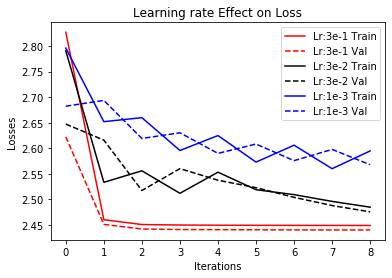

In [44]:
lr1_metrics = train(1000,learning_rate=3e-1,reg_str=1e-1)
lr2_metrics = train(1000,learning_rate=3e-2,reg_str=1e-1)
lr3_metrics = train(1000,learning_rate=3e-3,reg_str=1e-1)
fig = plt.figure()
axes = plt.subplot(111)
plt.plot(lr1_metrics["train_loss"],'r', label = "Lr:3e-1 Train")
plt.plot(lr1_metrics["val_loss"],'--r', label = "Lr:3e-1 Val")
plt.plot(lr2_metrics["train_loss"],'k', label = "Lr:3e-2 Train")
plt.plot(lr2_metrics["val_loss"],'--k', label = "Lr:3e-2 Val")
plt.plot(lr3_metrics["train_loss"],'b', label = "Lr:3e-3 Train")
plt.plot(lr3_metrics["val_loss"],'--b', label = "Lr:3e-3 Val")
axes.set_xlabel("Iterations")
axes.set_ylabel("Losses")
axes.legend()
axes.set_title("Learning rate Effect on Loss")
plt.show()

As we can see higher learning rate looks better in this problem.

### Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers

In [47]:
def train_batch(n_epochs,batch_size=1024,learning_rate=1e-1,reg_str=1e-6,momentum=False):
    model = layer.Model()
    layers = [layer.AffineLayer(x_train.shape[1],90), layer.ReLU(),
              layer.AffineLayer(90,num_labels), layer.Softmax()]
    model(layers) # Load layers to model object


    # Options
    metrics = {}
    train_losses = []
    val_losses   = []
    test_losses  = []
    
    train_accs   = []
    val_accs     = []
    test_accs    = []
    
    print_every = 125
    test_every  = 250
    
    if momentum:
        optimizer = layer.SGDWithMomentum(model,lr=learning_rate, regularization_str=reg_str)
    else:
        optimizer = layer.VanillaSDGOptimizer(model,lr=learning_rate, regularization_str=reg_str)
    
    for epoch in range(0,n_epochs+1):
        for batch in range(0, len(x_train_standard), batch_size):
            ### Training Phase ###
            softmax_out = model.forward(x_train_standard[batch:batch+batch_size])
            predictions = np.argmax(softmax_out, axis=1)

            train_acc = np.mean(predictions == y_train[batch:batch+batch_size])
            loss = layer.loss(softmax_out, y_train[batch:batch+batch_size])
            model.backward(y_train[batch:batch+batch_size])
            optimizer.optimize()


        if epoch % print_every == 0:    
            train_accs.append(train_acc)
            train_losses.append(loss)
            print("Epoch: {}\t Train\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, loss, train_acc))


        ### Validation Phase ###
        softmax_out = model.forward(x_val_standard)
        predictions = np.argmax(softmax_out, axis=1)

        val_acc = np.mean(predictions == y_val)
        val_loss = layer.loss(softmax_out, y_val)
        

        if epoch % print_every == 0:
            val_accs.append(val_acc)
            val_losses.append(val_loss)
            print("Epoch: {}\t Valid.\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, val_loss, val_acc))
        
        ### Test Phase ###
        if epoch % test_every == 0:
            softmax_out = model.forward(x_test_standard)
            predictions = np.argmax(softmax_out, axis=1)
            test_loss = layer.loss(softmax_out, y_test)
            test_acc = np.mean(predictions == y_test)
            test_losses.append([loss for _ in range(test_every//print_every)])
            test_accs.append([test_acc for _ in range(test_every//print_every)])
            print("Epoch: {}\t Test\t Loss: {:.4},\t Accuracy: {:.4}".format(epoch, test_loss, test_acc))
    
    test_losses = list(np.array(test_losses).flatten())
    test_accs = list(np.array(test_accs).flatten())

    metrics['train_loss'] = train_losses
    metrics['val_loss'] = val_losses
    metrics['test_loss'] = test_losses
    metrics['train_acc'] = train_accs
    metrics['val_acc'] = val_accs
    metrics['test_acc'] = test_accs
    print("Training finished lr: {} regul: {:.4} with Test Accuracy: {:.4}".format(learning_rate,reg_str,test_accs[-1]))

    return model, metrics    

Epoch: 0	 Train	 Loss: 2.663,	 Accuracy: 0.3026
Epoch: 0	 Valid.	 Loss: 2.478,	 Accuracy: 0.4954
Epoch: 0	 Test	 Loss: 2.48,	 Accuracy: 0.4827
Epoch: 125	 Train	 Loss: 2.436,	 Accuracy: 0.6395
Epoch: 125	 Valid.	 Loss: 2.435,	 Accuracy: 0.6188
Epoch: 250	 Train	 Loss: 2.436,	 Accuracy: 0.6352
Epoch: 250	 Valid.	 Loss: 2.435,	 Accuracy: 0.6188
Epoch: 250	 Test	 Loss: 2.443,	 Accuracy: 0.5911
Epoch: 375	 Train	 Loss: 2.436,	 Accuracy: 0.6373
Epoch: 375	 Valid.	 Loss: 2.435,	 Accuracy: 0.6188
Epoch: 500	 Train	 Loss: 2.436,	 Accuracy: 0.6352
Epoch: 500	 Valid.	 Loss: 2.435,	 Accuracy: 0.6196
Epoch: 500	 Test	 Loss: 2.443,	 Accuracy: 0.5911
Epoch: 625	 Train	 Loss: 2.436,	 Accuracy: 0.6373
Epoch: 625	 Valid.	 Loss: 2.435,	 Accuracy: 0.6184
Epoch: 750	 Train	 Loss: 2.435,	 Accuracy: 0.6352
Epoch: 750	 Valid.	 Loss: 2.435,	 Accuracy: 0.6184
Epoch: 750	 Test	 Loss: 2.443,	 Accuracy: 0.5908
Epoch: 875	 Train	 Loss: 2.435,	 Accuracy: 0.6352
Epoch: 875	 Valid.	 Loss: 2.435,	 Accuracy: 0.6188
Epo

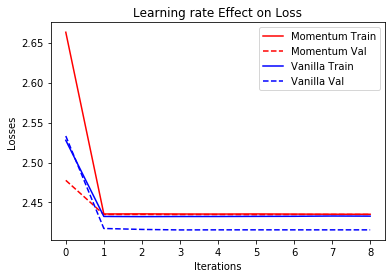

In [48]:
momentum_model , momentum_metrics = train_batch(1000,batch_size=1024,learning_rate=3e-1,reg_str=1e-1,momentum=True)
vanilla_model , vanilla_metrics = train_batch(1000,batch_size=1024,learning_rate=3e-1,reg_str=1e-1,momentum=False)
fig = plt.figure()
axes = plt.subplot(111)
plt.plot(momentum_metrics["train_loss"],'r', label = "Momentum Train")
plt.plot(momentum_metrics["val_loss"],'--r', label = "Momentum Val")
plt.plot(vanilla_metrics["train_loss"],'b', label = "Vanilla Train")
plt.plot(vanilla_metrics["val_loss"],'--b', label = "Vanilla Val")
axes.set_xlabel("Iterations")
axes.set_ylabel("Losses")
axes.legend()
axes.set_title("Learning rate Effect on Loss")
plt.show()

### Finally, fix your model and hyperparameters. Plot accuracy of your classification for training, validation set and Test set. 

In [49]:
final_model, final_metrics = train_batch(2250,batch_size=1024,learning_rate=5e-1,reg_str=1e-3,momentum=True)

Epoch: 0	 Train	 Loss: 2.624,	 Accuracy: 0.2732
Epoch: 0	 Valid.	 Loss: 2.505,	 Accuracy: 0.3884
Epoch: 0	 Test	 Loss: 2.523,	 Accuracy: 0.3665
Epoch: 125	 Train	 Loss: 2.128,	 Accuracy: 0.8584
Epoch: 125	 Valid.	 Loss: 2.326,	 Accuracy: 0.606
Epoch: 250	 Train	 Loss: 2.048,	 Accuracy: 0.9215
Epoch: 250	 Valid.	 Loss: 2.309,	 Accuracy: 0.6028
Epoch: 250	 Test	 Loss: 2.321,	 Accuracy: 0.5908
Epoch: 375	 Train	 Loss: 2.111,	 Accuracy: 0.8208
Epoch: 375	 Valid.	 Loss: 2.3,	 Accuracy: 0.6028
Epoch: 500	 Train	 Loss: 1.973,	 Accuracy: 0.994
Epoch: 500	 Valid.	 Loss: 2.29,	 Accuracy: 0.614
Epoch: 500	 Test	 Loss: 2.301,	 Accuracy: 0.597
Epoch: 625	 Train	 Loss: 1.963,	 Accuracy: 0.996
Epoch: 625	 Valid.	 Loss: 2.285,	 Accuracy: 0.6148
Epoch: 750	 Train	 Loss: 1.97,	 Accuracy: 0.994
Epoch: 750	 Valid.	 Loss: 2.283,	 Accuracy: 0.6228
Epoch: 750	 Test	 Loss: 2.297,	 Accuracy: 0.5966
Epoch: 875	 Train	 Loss: 1.954,	 Accuracy: 0.998
Epoch: 875	 Valid.	 Loss: 2.287,	 Accuracy: 0.6128
Epoch: 1000	 

### Plot a Confusion Matrix for test set 

In [50]:
# This visualization code retrived from:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# This is only for visualization purposes.
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



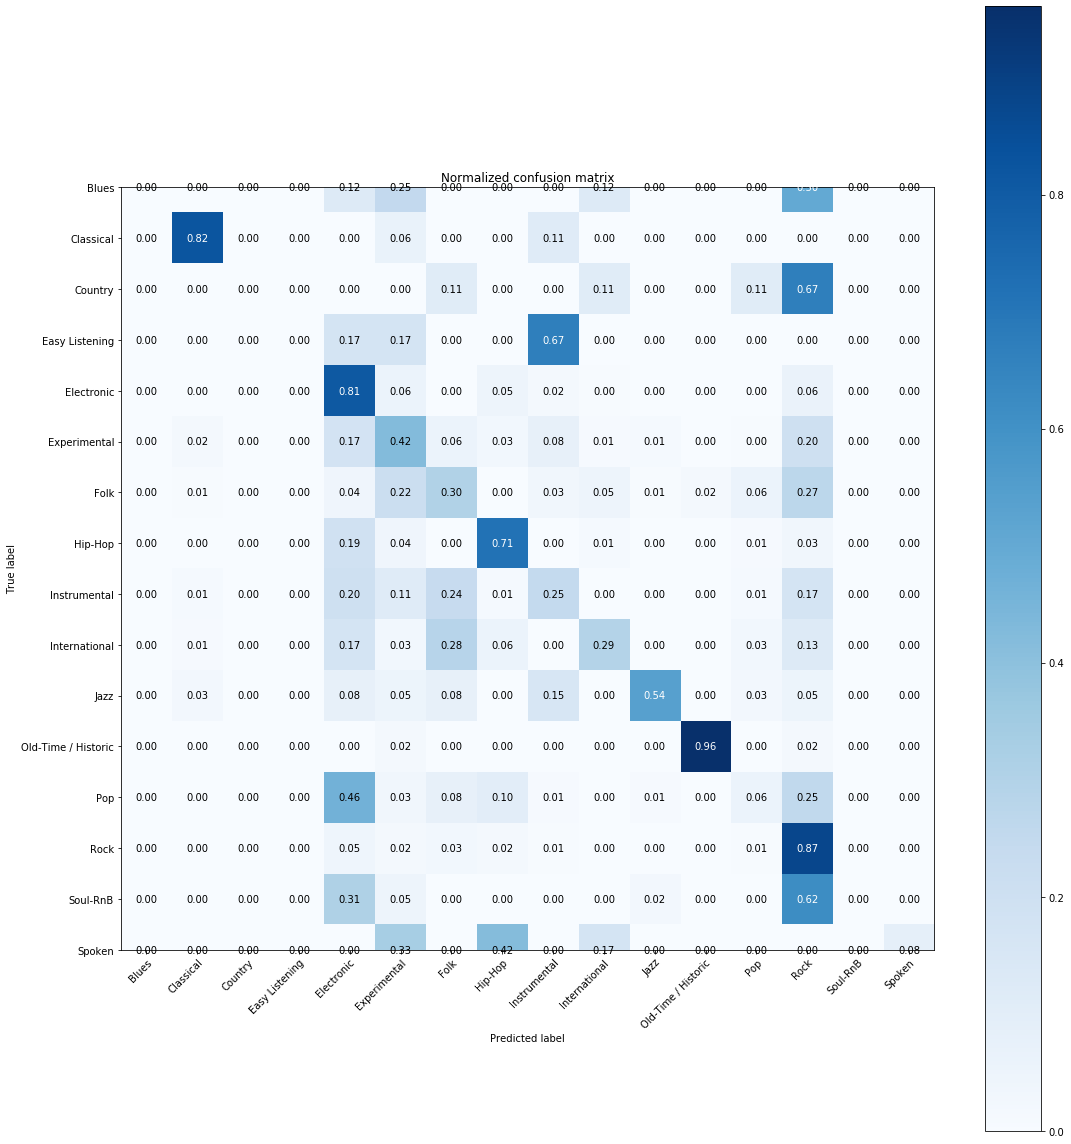

Test Accuracy: 0.6351


In [51]:
from sklearn.metrics import confusion_matrix


model_out = model.forward(x_test_standard)
predictions = np.argmax(model_out, axis=1)
plot_confusion_matrix(y_test,predictions,genres,True)
test_acc = np.mean(predictions == y_test)
plt.show()
print("Test Accuracy: {:.4}".format(test_acc))

 ### **You can see that some classes are accurately predicted but model makes lots of eloctronic and rock predictions and seems that it converge to these two classes. The reason of this can be data imbalance in the dataset, or bad regularization.**
### **Also there are some real bad situations where most of the Soul-RnB songs confused with Rock and Pop songs confused with Electronic. Another point that Soul-RnB never predicted as true, this should be investigated with the dataset.**
  

### Do model of your demo with popular songs

In [52]:
# Demo is not necessary but it is FUN!
# You have to install librosa library by using "pip install librosa"
# If you are getting NoBackEndError while loading track try "sudo apt-get install libav-tools"
# Give filepath to mp3 of your favorite songs and see how good is your model at classifying them.

import librosa
#filepath = 'music/BohemianRhapsody(Cover).mp3'
filepath = 'music/Chopin.mp3'

x, sr = librosa.load(filepath, sr=None, mono=True) #librosa.load(librosa.util.example_audio_file(), duration=5.0)#
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 10,40
ipd.Audio(data=x[start*sr:end*sr], rate=sr)



/home/alperen/anaconda3/envs/PyTorch/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Duration: 242.73s, 10704384 samples


In [53]:
from blg561.extract_features import extract_features
model = final_model
x_feat = extract_features(x,sr)
x_feat = np.array(x_feat).reshape(1,-1)
# You have to transform features to standard scale using mean and std calculated before. 
x_feat = np.divide((x_feat-train_mean),train_std)

In [54]:
#print(enc.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))
softmax_out = model.forward(x_feat)
prediction = np.argmax(softmax_out)
print(enc.inverse_transform([prediction]))

['Classical']


### Results Chopin=Classsical, Gurbet=Rock, BohemianRhapsody(Cover)= Classical, Bad guy = Experimental